# 最后的阶段性大作业

用所学知识对CDNow网站的用户购买明细数据进行分析
四个字段分别为：用户ID，购买日期，购买数量，购买金额。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## 数据导入

In [2]:
# 用户ID，购买日期，购买数量，购买金额。

columns = ['user_id', 'order_dt', 'quantity', 'total']
data = pd.read_table('CDNOW.txt', names=columns, sep='\s+')

D:\Anaconda111\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


In [3]:
data.head()

,user_id,order_dt,quantity,total
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


## step2 

In [4]:
data['order_date'] = pd.to_datetime(data.order_dt, format="%Y%m%d")

data['month'] = data['order_date'].astype('datetime64[M]')

# data = data.reindex(columns=['user_id', 'order_date', 'month', 'quantity', 'total'])


In [5]:
data.head()

,user_id,order_dt,quantity,total,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


# 商品销售分析

In [6]:
data.describe()

,user_id,order_dt,quantity,total
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


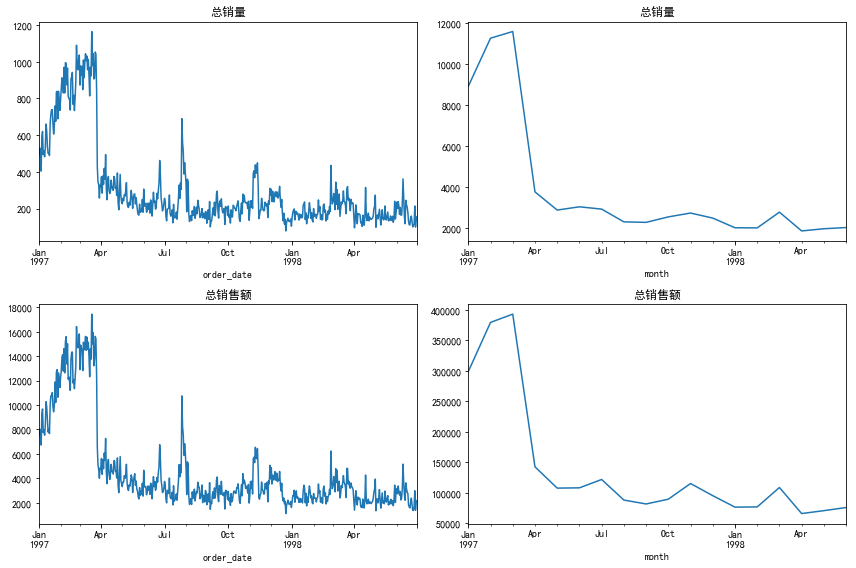

In [7]:
# 订单购买数量&订单购买金额 趋势分析

#解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 设置图的大小，添加子图
plt.figure(figsize=(12,8))

# 每天的购买数量
plt.subplot(221)
data.groupby('order_date')['quantity'].sum().plot() 
plt.title('总销量') 
 
#每月的购买数量
plt.subplot(222)
data.groupby('month')['quantity'].count().plot()
plt.title('总销量') 

#每天的购买金额
plt.subplot(223)
data.groupby('order_date')['total'].sum().plot()
plt.title('总销售额')

#每月的购买金额
plt.subplot(224)
data.groupby('month')['total'].sum().plot()
plt.title('总销售额')
plt.tight_layout() # 设置子图的间距
plt.show()

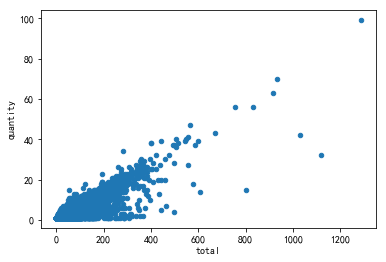

In [8]:
# 异常值检测
data.plot.scatter(x='total', y='quantity')

## 用户消费行为

In [9]:
# 各用户 累计购买数量&购买金额分析

data.groupby('user_id').sum().describe()

,order_dt,quantity,total
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


观察mean

In [10]:
# 各用户 购买数量&购买金额 累计贡献分析

(data.groupby('user_id')['quantity'].sum()/data['quantity'].sum()).describe()

count    23570.000000
mean         0.000042
std          0.000101
min          0.000006
25%          0.000006
50%          0.000018
75%          0.000042
max          0.006153
Name: quantity, dtype: float64

In [11]:
(data.groupby('user_id')['total'].sum()/data['total'].sum()).describe()

count    23570.000000
mean         0.000042
std          0.000096
min          0.000000
25%          0.000008
50%          0.000017
75%          0.000043
max          0.005596
Name: total, dtype: float64

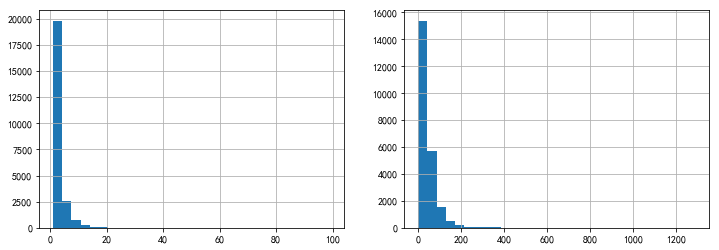

In [12]:
# 各用户最大单笔 购买数量&消费金额 分析
plt.figure(figsize=(12,4))
plt.subplot(121)
data.groupby('user_id')['quantity'].max().hist(bins=30)
plt.subplot(122)
data.groupby('user_id')['total'].max().hist(bins=30)

## 购买次数 

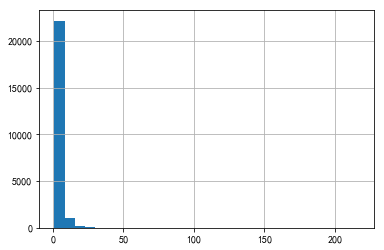

In [13]:
data['user_id'].value_counts().hist(bins=30)

# 用户消费行为分析 

In [14]:
data.groupby('user_id')['month'].min().value_counts()/data['user_id'].nunique()

1997-02-01    0.359610
1997-01-01    0.332881
1997-03-01    0.307510
Name: month, dtype: float64

In [15]:
data.groupby('user_id')['month'].min().value_counts()/data['user_id'].nunique()

1997-02-01    0.359610
1997-01-01    0.332881
1997-03-01    0.307510
Name: month, dtype: float64

## 距最后一次消费 

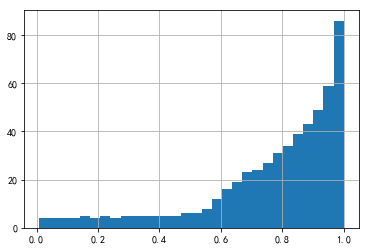

In [17]:
date_diff = datetime.now() - data.groupby('user_id')['order_date'].max()
((date_diff.value_counts().cumsum()/data['user_id'].nunique())).hist(bins=30)

## 消费周期 

In [18]:
order_date_min = data.groupby("user_id")['order_date'].min()
order_date_max = data.groupby("user_id")['order_date'].max()

(order_date_max-order_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [19]:
(order_date_max-order_date_min).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

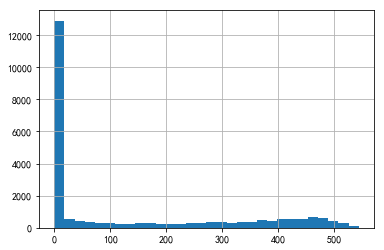

In [20]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=30)

In [21]:
life_cycle = (order_date_max-order_date_min).reset_index()
life_cycle.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


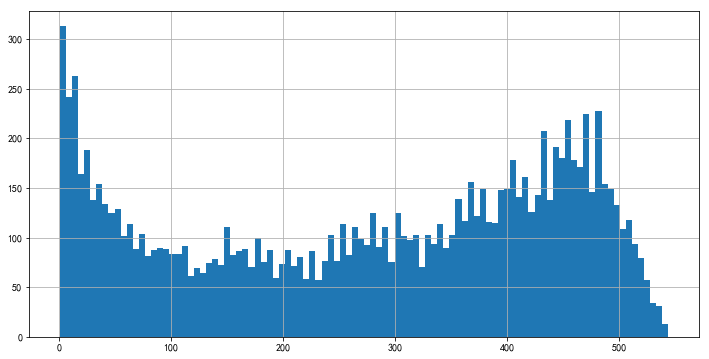

In [22]:
life_cycle['life_time'] = life_cycle['order_date']/np.timedelta64(1,'D')
life_cycle[life_cycle['life_time']>0]['life_time'].hist(bins=100, figsize=(12,6))

In [23]:
life_cycle[life_cycle['life_time']>0]['life_time'].describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: life_time, dtype: float64

# 复购与回购

In [24]:
# 复购率

#统计消费用户消费次数
pivoted_counts=data.pivot_table(index='user_id',columns='month',values='order_date',aggfunc='count').fillna(0)
columns_month=data.month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 消费两次及以上记为1，消费一次记0，没有消费记为NaN

pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


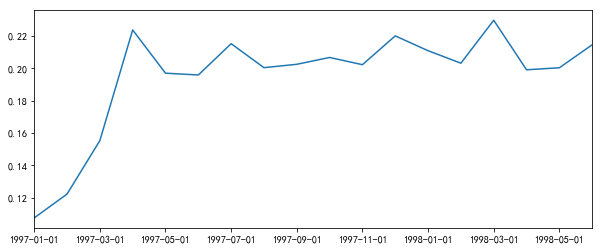

In [26]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))

In [27]:
# 回购率

pivoted_amount = data.pivot_table(index = 'user_id', columns = 'month',
                               values = 'total', aggfunc = 'mean').fillna(0)
columns_month = data.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [28]:
# 某月内有消费记录记为1，没有则为0.

pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [30]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
#Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


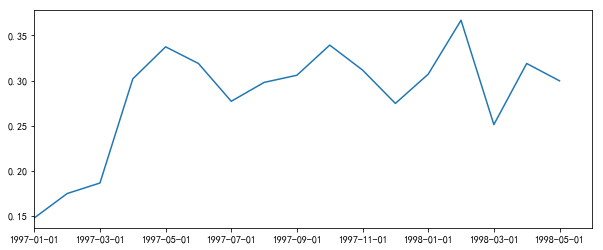

In [31]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

# 留存

In [32]:
user_purchase_retention = pd.merge(left = data, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'user_id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()

,user_id,order_dt,quantity,total,order_date,month,order_date_min
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02


In [35]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()

,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0


In [36]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,user_id,order_dt,quantity,total,order_date,month,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0,NaN
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,19970402,2,19.54,1997-04-02,1997-04-01,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,19971115,5,57.45,1997-11-15,1997-11-01,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,19971125,4,20.96,1997-11-25,1997-11-01,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,19980528,1,16.99,1998-05-28,1998-05-01,1997-01-02,511 days,511.0,NaN
9,4,19970101,2,29.33,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN


In [37]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id', columns = 'date_diff_bin',
                                                       values = 'total', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN      40.3   
4                 NaN     NaN      NaN     29.73       NaN       NaN   
5                 NaN     NaN    13.97       NaN      38.9       NaN   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN       78.41  
4                    NaN       41.44  
5                  110.4      155.54  

In [38]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [39]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                      0           0  
2                      0           0  
3                      0           1  
4                      0           1  
5                      1           1  

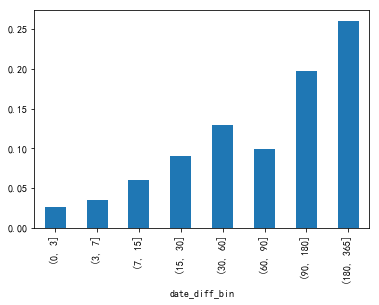

In [40]:
pivoted_retention_trans.mean().plot.bar()

# 用户信息

In [41]:
def active_ststus(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = columns_month, index = user_id)
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [42]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts) #此时apply是在列上执行运算
#把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


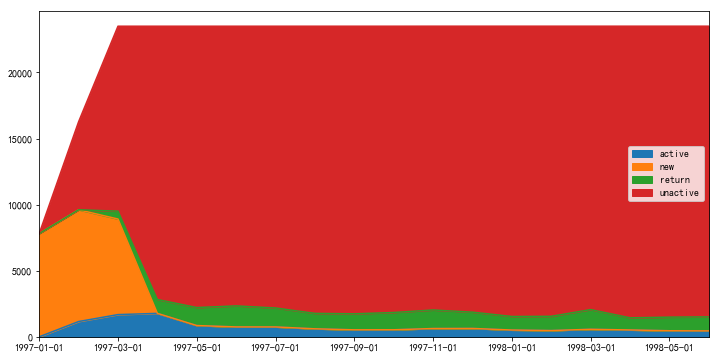

In [43]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,6))

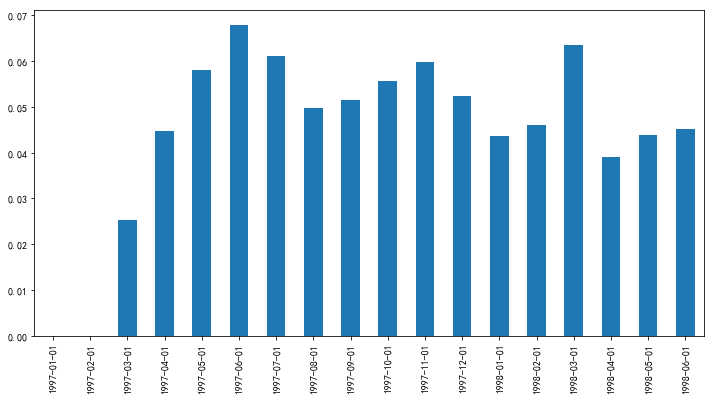

In [44]:

return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

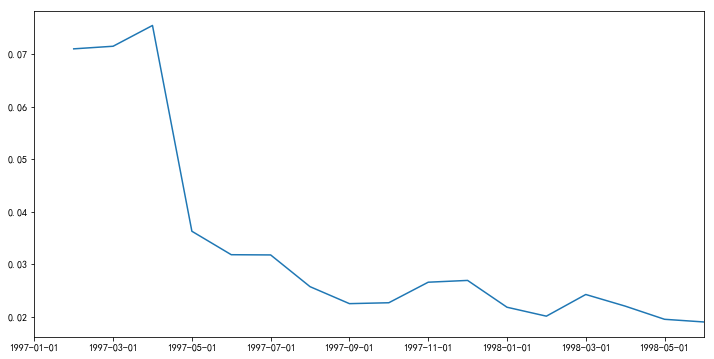

In [45]:
return_rate.loc['active'].plot(figsize = (12,6)) #每月活跃用户的占比

# 总结